<a href="https://colab.research.google.com/github/edubotmaster/-_GPS-/blob/main/PDB%20ID%203BKL%203D%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%9D%98%20%EA%B8%B0%ED%95%98%EC%A0%81%20%ED%95%B4%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


거리 계산 예시:
Residue 568 CA와 569 CA 사이의 거리: 3.78 Å

각도 계산 예시:


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48177 (\N{HANGUL SYLLABLE BAEG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

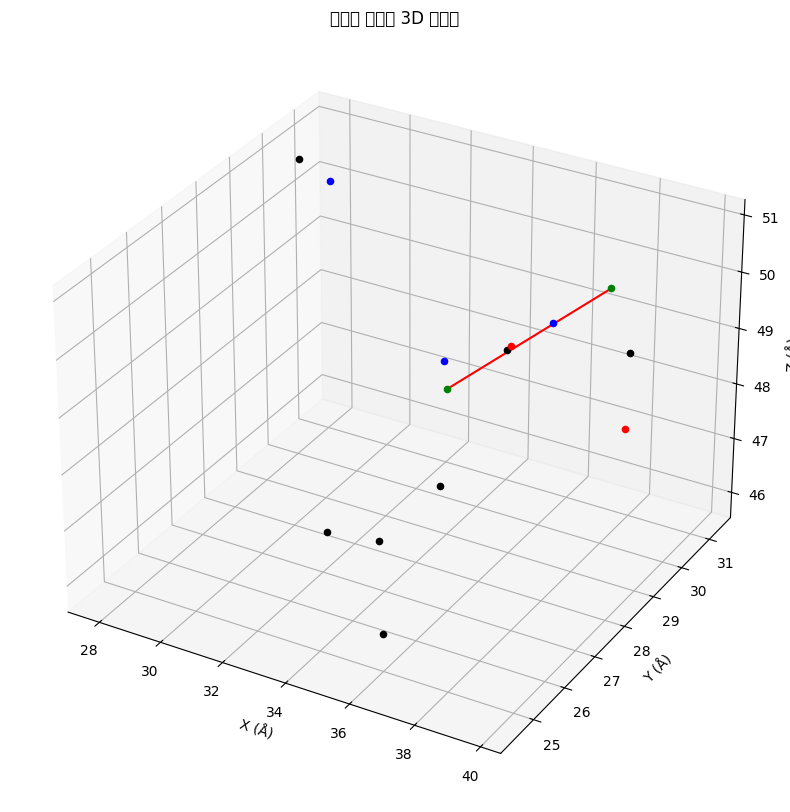

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 원자 좌표 데이터를 딕셔너리로 저장
atoms = {}
data = '''ATOM   4333  CE  LYS A 567      28.029  30.123  50.899  1.00 30.84           C
ATOM   4334  NZ  LYS A 567      27.834  31.284  49.991  1.00 29.59           N
ATOM   4335  N   LEU A 568      34.719  28.147  49.220  1.00 20.25           N
ATOM   4336  CA  LEU A 568      35.787  27.158  49.371  1.00 19.55           C
ATOM   4337  C   LEU A 568      37.058  27.741  49.969  1.00 18.86           C
ATOM   4338  O   LEU A 568      37.885  27.003  50.523  1.00 17.99           O
ATOM   4339  CB  LEU A 568      36.169  26.566  48.027  1.00 19.65           C
ATOM   4340  CG  LEU A 568      35.121  25.731  47.319  1.00 19.27           C
ATOM   4341  CD1 LEU A 568      35.562  25.406  45.892  1.00 18.65           C
ATOM   4342  CD2 LEU A 568      34.831  24.462  48.095  1.00 19.34           C
ATOM   4343  N   GLY A 569      37.224  29.057  49.846  1.00 17.99           N
ATOM   4344  CA  GLY A 569      38.434  29.680  50.347  1.00 18.08           C
ATOM   4345  C   GLY A 569      39.650  28.995  49.731  1.00 18.56           C
ATOM   4346  O   GLY A 569      39.736  28.813  48.508  1.00 16.72           O'''

for line in data.split('\n'):
    if line.startswith('ATOM'):
        atom_name = line[12:16].strip()
        x = float(line[30:38])
        y = float(line[38:46])
        z = float(line[46:54])
        res_num = int(line[22:26])
        atoms[(res_num, atom_name)] = np.array([x, y, z])

# 1. 두 원자 간의 거리 계산
def calculate_distance(coord1, coord2):
    return np.linalg.norm(coord1 - coord2)

# 2. 세 원자가 이루는 각도 계산
def calculate_angle(coord1, coord2, coord3):
    v1 = coord1 - coord2
    v2 = coord3 - coord2
    cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    return np.degrees(np.arccos(np.clip(cos_angle, -1.0, 1.0)))

# 3D 시각화
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# 모든 원자 플롯
colors = {'N': 'blue', 'C': 'black', 'O': 'red', 'CA': 'green'}
for (res_num, atom_name), coord in atoms.items():
    first_letter = atom_name[0]
    color = colors.get(first_letter, 'gray')
    if atom_name == 'CA':
        color = colors['CA']
    ax.scatter(coord[0], coord[1], coord[2], c=color, marker='o')

# CA 원자들을 선으로 연결
for i in range(567, 569):
    if (i, 'CA') in atoms and (i+1, 'CA') in atoms:
        coord1 = atoms[(i, 'CA')]
        coord2 = atoms[(i+1, 'CA')]
        ax.plot([coord1[0], coord2[0]],
                [coord1[1], coord2[1]],
                [coord1[2], coord2[2]], 'r-')

ax.set_xlabel('X (Å)')
ax.set_ylabel('Y (Å)')
ax.set_zlabel('Z (Å)')
plt.title('단백질 구조의 3D 시각화')

# 거리와 각도 계산 예시
print("\n거리 계산 예시:")
if (568, 'CA') in atoms and (569, 'CA') in atoms:
    dist = calculate_distance(atoms[(568, 'CA')], atoms[(569, 'CA')])
    print(f"Residue 568 CA와 569 CA 사이의 거리: {dist:.2f} Å")

print("\n각도 계산 예시:")
if all(k in atoms for k in [(567, 'CA'), (568, 'CA'), (569, 'CA')]):
    angle = calculate_angle(atoms[(567, 'CA')],
                          atoms[(568, 'CA')],
                          atoms[(569, 'CA')])
    print(f"CA 원자들이 이루는 각도 (567-568-569): {angle:.2f}°")

plt.show()
